## DEF OF CLASSES "ROUTE" AND "AIRPORT"

In [6]:
class Airport:
    name = ""
    city = ""
    country = ""
    iata = ""
    icao = ""
    lat = 0.
    long = 0.
    def info(self):
        return f'{self.iata}, {self.icao}\n{self.city}, {self.country}\nlat={self.lat}, long={self.long}'

class Route:
    source_iata = ""
    source_icao = ""
    dest_iata = ""
    dest_icao = ""
    dest_city = ""
    source_city = ""
    dest_country = ""
    source_country = ""
    flux = 0 # passenger per year (2017)
    def info(self):
        return f'source: {self.source_city}, {self.source_country}\ndest: {self.dest_city}, {self.dest_country}\nflux: {self.flux}'
    
    # Nota : il flusso verrà preso da un file che contiene solo rotte
    # per numero di passeggeri maggiore di 50000 all'anno
    
    #aggiungo questa proprietà così che quando confronto due oggetti
    #di questa classe, controlla il contenuto degli oggetti, e non
    #l'hash. Serve per eliminare i duplicati.
    def __eq__(self, other) : 
        return self.__dict__ == other.__dict__

## LOAD DATABASES
Ho salvato i databases in formato ".npy" così non c'è bisogno di rieffettuare ogni volta tutta l'estrazione dai csv.

In [7]:
import pickle

try:
    with open("data/db_routes_new.dat", "rb") as f:
        routes = pickle.load(f)
except Exception as e: print(e)
try:
    with open("data/db_it_airports.dat", "rb") as f:
        it_airports = pickle.load(f)
except Exception as e: print(e)
    
# creo lista aeroporti inutili (senza collegamenti)
useless_airports = []
for airport in it_airports:
    if len(airport.neigs_in) == 0:
        useless_airports.append([airport.iata, airport.city])

### apro file e lo importo

In [8]:
import csv

regioni = []
with open('./provincia-regione-sigla_.csv') as file :
        reader = csv.reader(file, delimiter=',')
        for line in reader:
            regioni.append(line)

### cerco di renderlo compatibile col nostro database

In [9]:
tan = []
for airport in regioni:
    translated_airport = []
    for i in range(len(regioni[0])):
        if 'Napoli' in airport[i]:
            translated_airport.append(airport[i].replace('Napoli','Naples'))
        if 'Torino' in airport[i]:
            translated_airport.append(airport[i].replace('Torino','Turin'))
        elif 'Roma' in airport[i]:
            translated_airport.append(airport[i].replace('Roma','Rome'))
        elif 'Milano' in airport[i]:
            translated_airport.append(airport[i].replace('Milano','Milan'))
        elif 'Venezia' in airport[i]:
            translated_airport.append(airport[i].replace('Venezia','Venice'))
        elif 'Catanzaro' in airport[i]:
            translated_airport.append(airport[i].replace('Catanzaro','Lamezia'))
        elif 'Genova' in airport[i]:
            translated_airport.append(airport[i].replace('Genova','Genoa'))
        elif 'Firenze' in airport[i]:
            translated_airport.append(airport[i].replace('Firenze','Florence'))
        elif 'Gorizia' in airport[i]:
            translated_airport.append(airport[i].replace('Gorizia','Ronchi De Legionari'))
        elif 'Verona' in airport[i]:
            translated_airport.append(airport[i].replace('Verona','Villafranca'))
        else:
            translated_airport.append(airport[i])
    
    tan.append(translated_airport)
    
# aggiungo a mano alcune città
tan.append(['Lampedusa','Sicilia'])
tan.append(['Comiso','Sicilia'])
tan.append(['Pantelleria','Sicilia'])    
tan.append(['Alghero','Sardegna'])
tan.append(['Olbia','Sardegna'])
tan.append(['Milano','Lombardia'])
tan.append(['Torino','Piemonte'])
tan.append(['Verona','Veneto'])
tan[59] = ['Naples','Campania']
tan.append(['Napoli','Campania'])

# Inserisco info sulla regione nel nostro database degli aeroporti italiani (it_airports)
### Ciò che printa sono gli aeroporti di cui non ha trovato la regione. Basta che essi siano quelli nella lista degli "inutili"

In [10]:
j = 0
for airport in it_airports:
    i=0
    for line in tan:
        if airport.city == line[0]:
            airport.regione= line[1]
            i+=1
            j+=1
            break
        elif airport.city=='Amendola':
            airport.regione='Puglia'
            i+=1
            j+=1
            break
    if i==0:
        airport.regione = ''
        print (airport.city)
        
print(j)

Grottaglie
Gioia Del Colle
Sigonella
Decimomannu
Tortoli
Albenga
Cameri
Aviano
Cervia
Rivolto
Forli
Ghedi
Pratica Di Mare
Guidonia
Marina Di Campo
Grazzanise
Trento (TN)
Biella (BI)
Casale Monferrato
Novi Ligure
Sarzana (SP)
62


### Risultato

In [11]:
i = 0
for airport in it_airports:
    if airport.iata not in [line[0] for line in useless_airports]:
        print(airport.iata, airport.regione)
        i += 1
i

BRI Puglia
PSR Abruzzo
BDS Puglia
SUF Calabria
CTA Sicilia
LMP Sicilia
PNL Sicilia
PMO Sicilia
REG Calabria
TPS Sicilia
AHO Sardegna
CAG Sardegna
OLB Sardegna
MXP Lombardia
BGY Lombardia
TRN Piemonte
GOA Liguria
LIN Lombardia
PMF Emilia-Romegna
CUF Piemonte
BZO Trentino-Alto Adige
BLQ Emilia-Romegna
TSF Veneto
TRS Friuli-Venice Giulia
VRN Veneto
VCE Veneto
CIA Lazio
FCO Lazio
NAP Campania
PSA Toscana
FLR Toscana
PEG Umbria
AOI Marche
CIY Sicilia


34

# matrice regioni

In [12]:
regioni = ['Puglia'
,'Abruzzo'
,'Calabria'
,'Sardegna'
,'Lombardia'
,'Piemonte'
,'Liguria'
,'Emilia-Romegna'
,'Trentino-Alto Adige'
,'Veneto'
,'Friuli-Venice Giulia'
,'Lazio'
,'Campania'
,'Toscana'
,'Umbria'
,'Marche'
,'Sicilia']

### per Francesco
regioni = ['Abruzzo', 'Basilicata', 'Calabria',
           'Campania', 'Emilia-Romegna', 'Friuli-Venice Giulia',
           'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise',
           'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana',
           'Trentino-Alto Adige', 'Umbria', "Valle d'Aosta", 'Veneto']

class route:
    nome = ''
    flux = 0.
    
routee = []
for regione in regioni:
    aa = route()
    aa.nome = regione
    routee.append(aa)

In [13]:
class regione:
    def __init__(self):
        routee = []
        for regione in regioni:
            aa = route()
            aa.nome = regione
            routee.append(aa)
        self.nome = ''
        self.neigs_in = routee
        routee = []
        for regione in regioni:
            aa = route()
            aa.nome = regione
            routee.append(aa)

        self.neigs_out = routee

db_regioni = []
for bb in regioni:
    aa = regione()
    aa.nome = bb
    db_regioni.append(aa)

In [14]:
db_regioni

### db_regioni:
- nome
- lista contentente ogni altra regione e relativo flusso verso e da quella regione
- totale entrante e uscente dalla regione

In [15]:
##### out
it_routes = []
for route in routes:
    if route.dest_country == 'Italy' and route.source_country == 'Italy':
        it_routes.append(route)
        

for route in it_routes:
    indice_part = 'cacca'
    indice_dest = 'cacca'
    for aa in it_airports:
        if aa.iata == route.source_iata:
            regione_part = aa.regione
            break
    for aa in it_airports:
        if  aa.iata == route.dest_iata:
            regione_dest = aa.regione
            break
            
    indice_part = regioni.index(regione_part)
    indice_dest = regioni.index(regione_dest)
    if indice_part == indice_dest:
        print(route.source_iata, route.dest_iata, route.flux)
    db_regioni[indice_part].neigs_out[indice_dest].flux += route.flux
    db_regioni[indice_dest].neigs_in[indice_part].flux += route.flux

CTA LMP 1
LMP CTA 1
LMP PMO 1
PMO LMP 1
PMO PNL 1
PNL PMO 1
PNL TPS 1
TPS PNL 1
PMO CTA 1


In [16]:
import numpy as np
matrice = np.zeros((20,20))
for i, regione in enumerate(db_regioni):
    for j, dest in enumerate(regione.neigs_out):
        matrice[i,j] = dest.flux
        if matrice[i,j] < 50000: matrice[i,j] = 0
        #print(regione.nome, dest.nome, dest.flux)

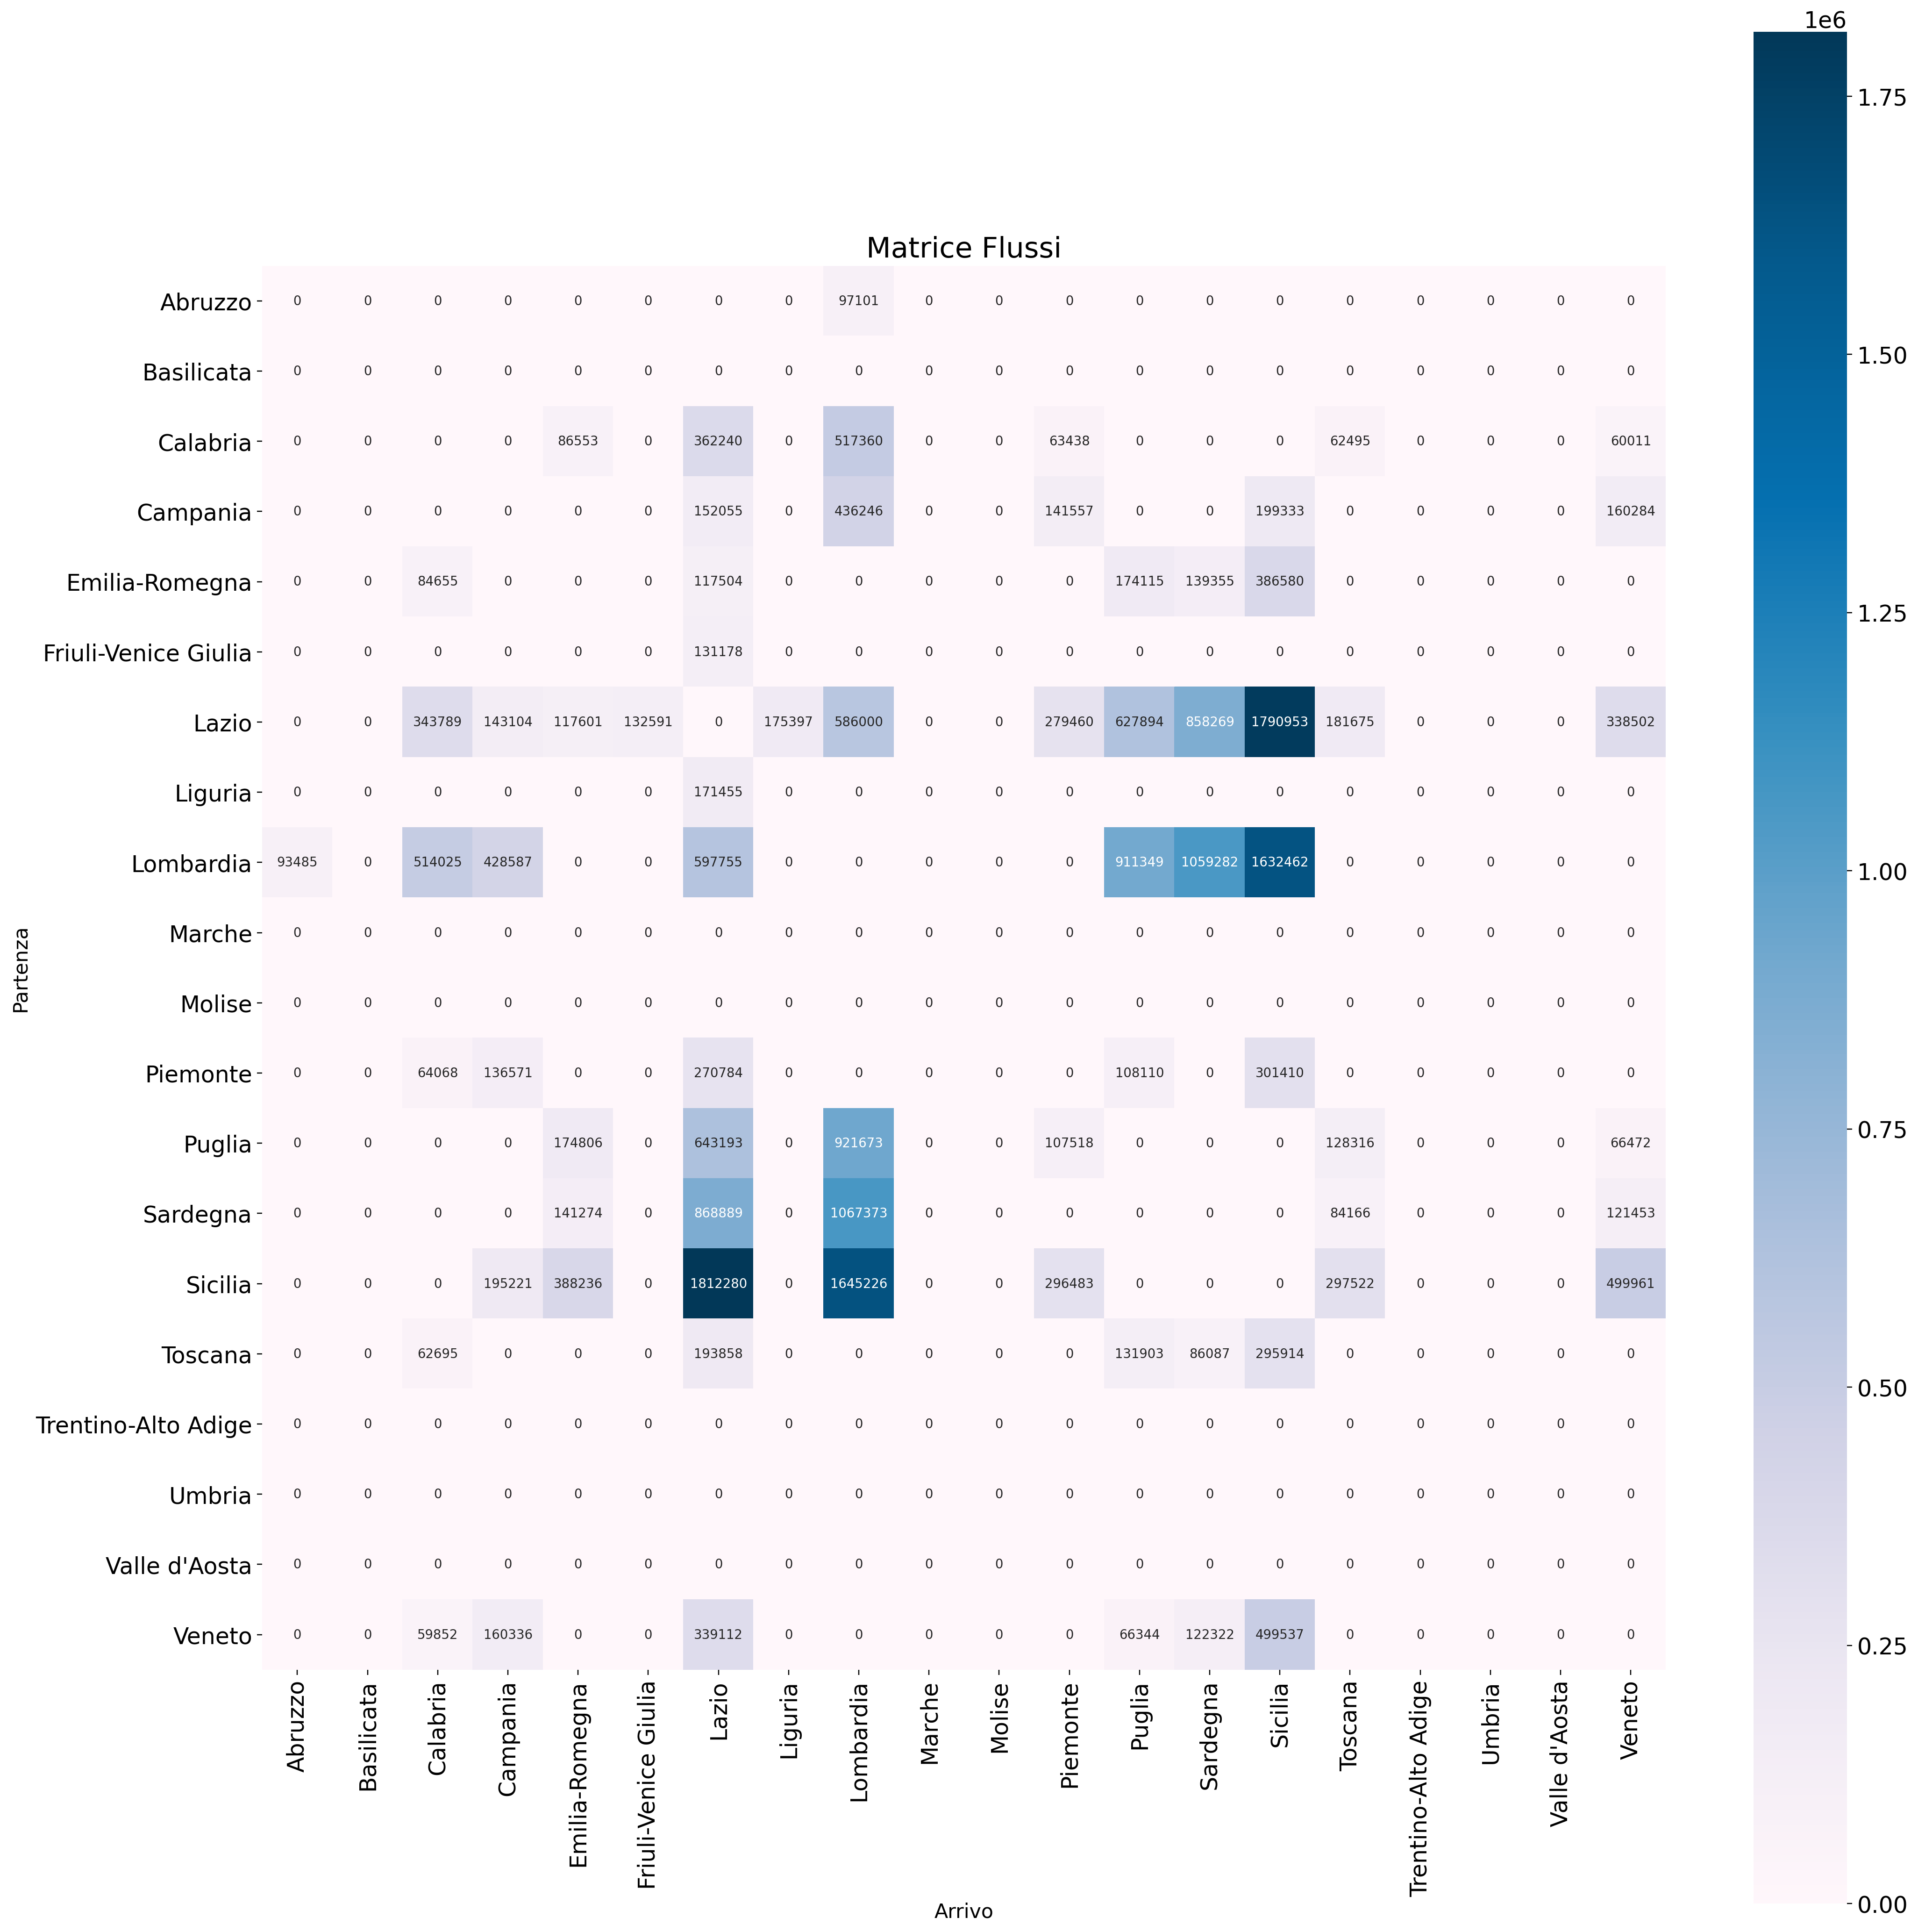

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,20), dpi=220)
plt.title('Matrice Flussi', fontsize=20)
hm = sns.heatmap(matrice,cbar=True,fmt='.0f',annot=True,square=True,annot_kws={'size': 9},
                 cmap = sns.color_palette("PuBu", 500), xticklabels=regioni, yticklabels=regioni)
plt.ylabel('Partenza',fontsize=14)
plt.xlabel('Arrivo',fontsize=14)
plt.tight_layout()
plt.savefig("img/matriceflussi.pdf", dpi=220, format='pdf')
plt.show()

In [26]:
matrice_in = np.zeros((20,20))
matrice_out = np.zeros((20,20))

for i,riga in enumerate(matrice):
    tot = np.sum(riga)
    if tot > 0:
        matrice_out[i,:] = riga/tot
    else: matrice_out[i,:] = 0
        
for j, colonna in enumerate(matrice.transpose()):
    tot = np.sum(colonna)
    if tot > 0:
        matrice_in[:,j] = colonna/tot
    else: matrice_in[:,j] = 0

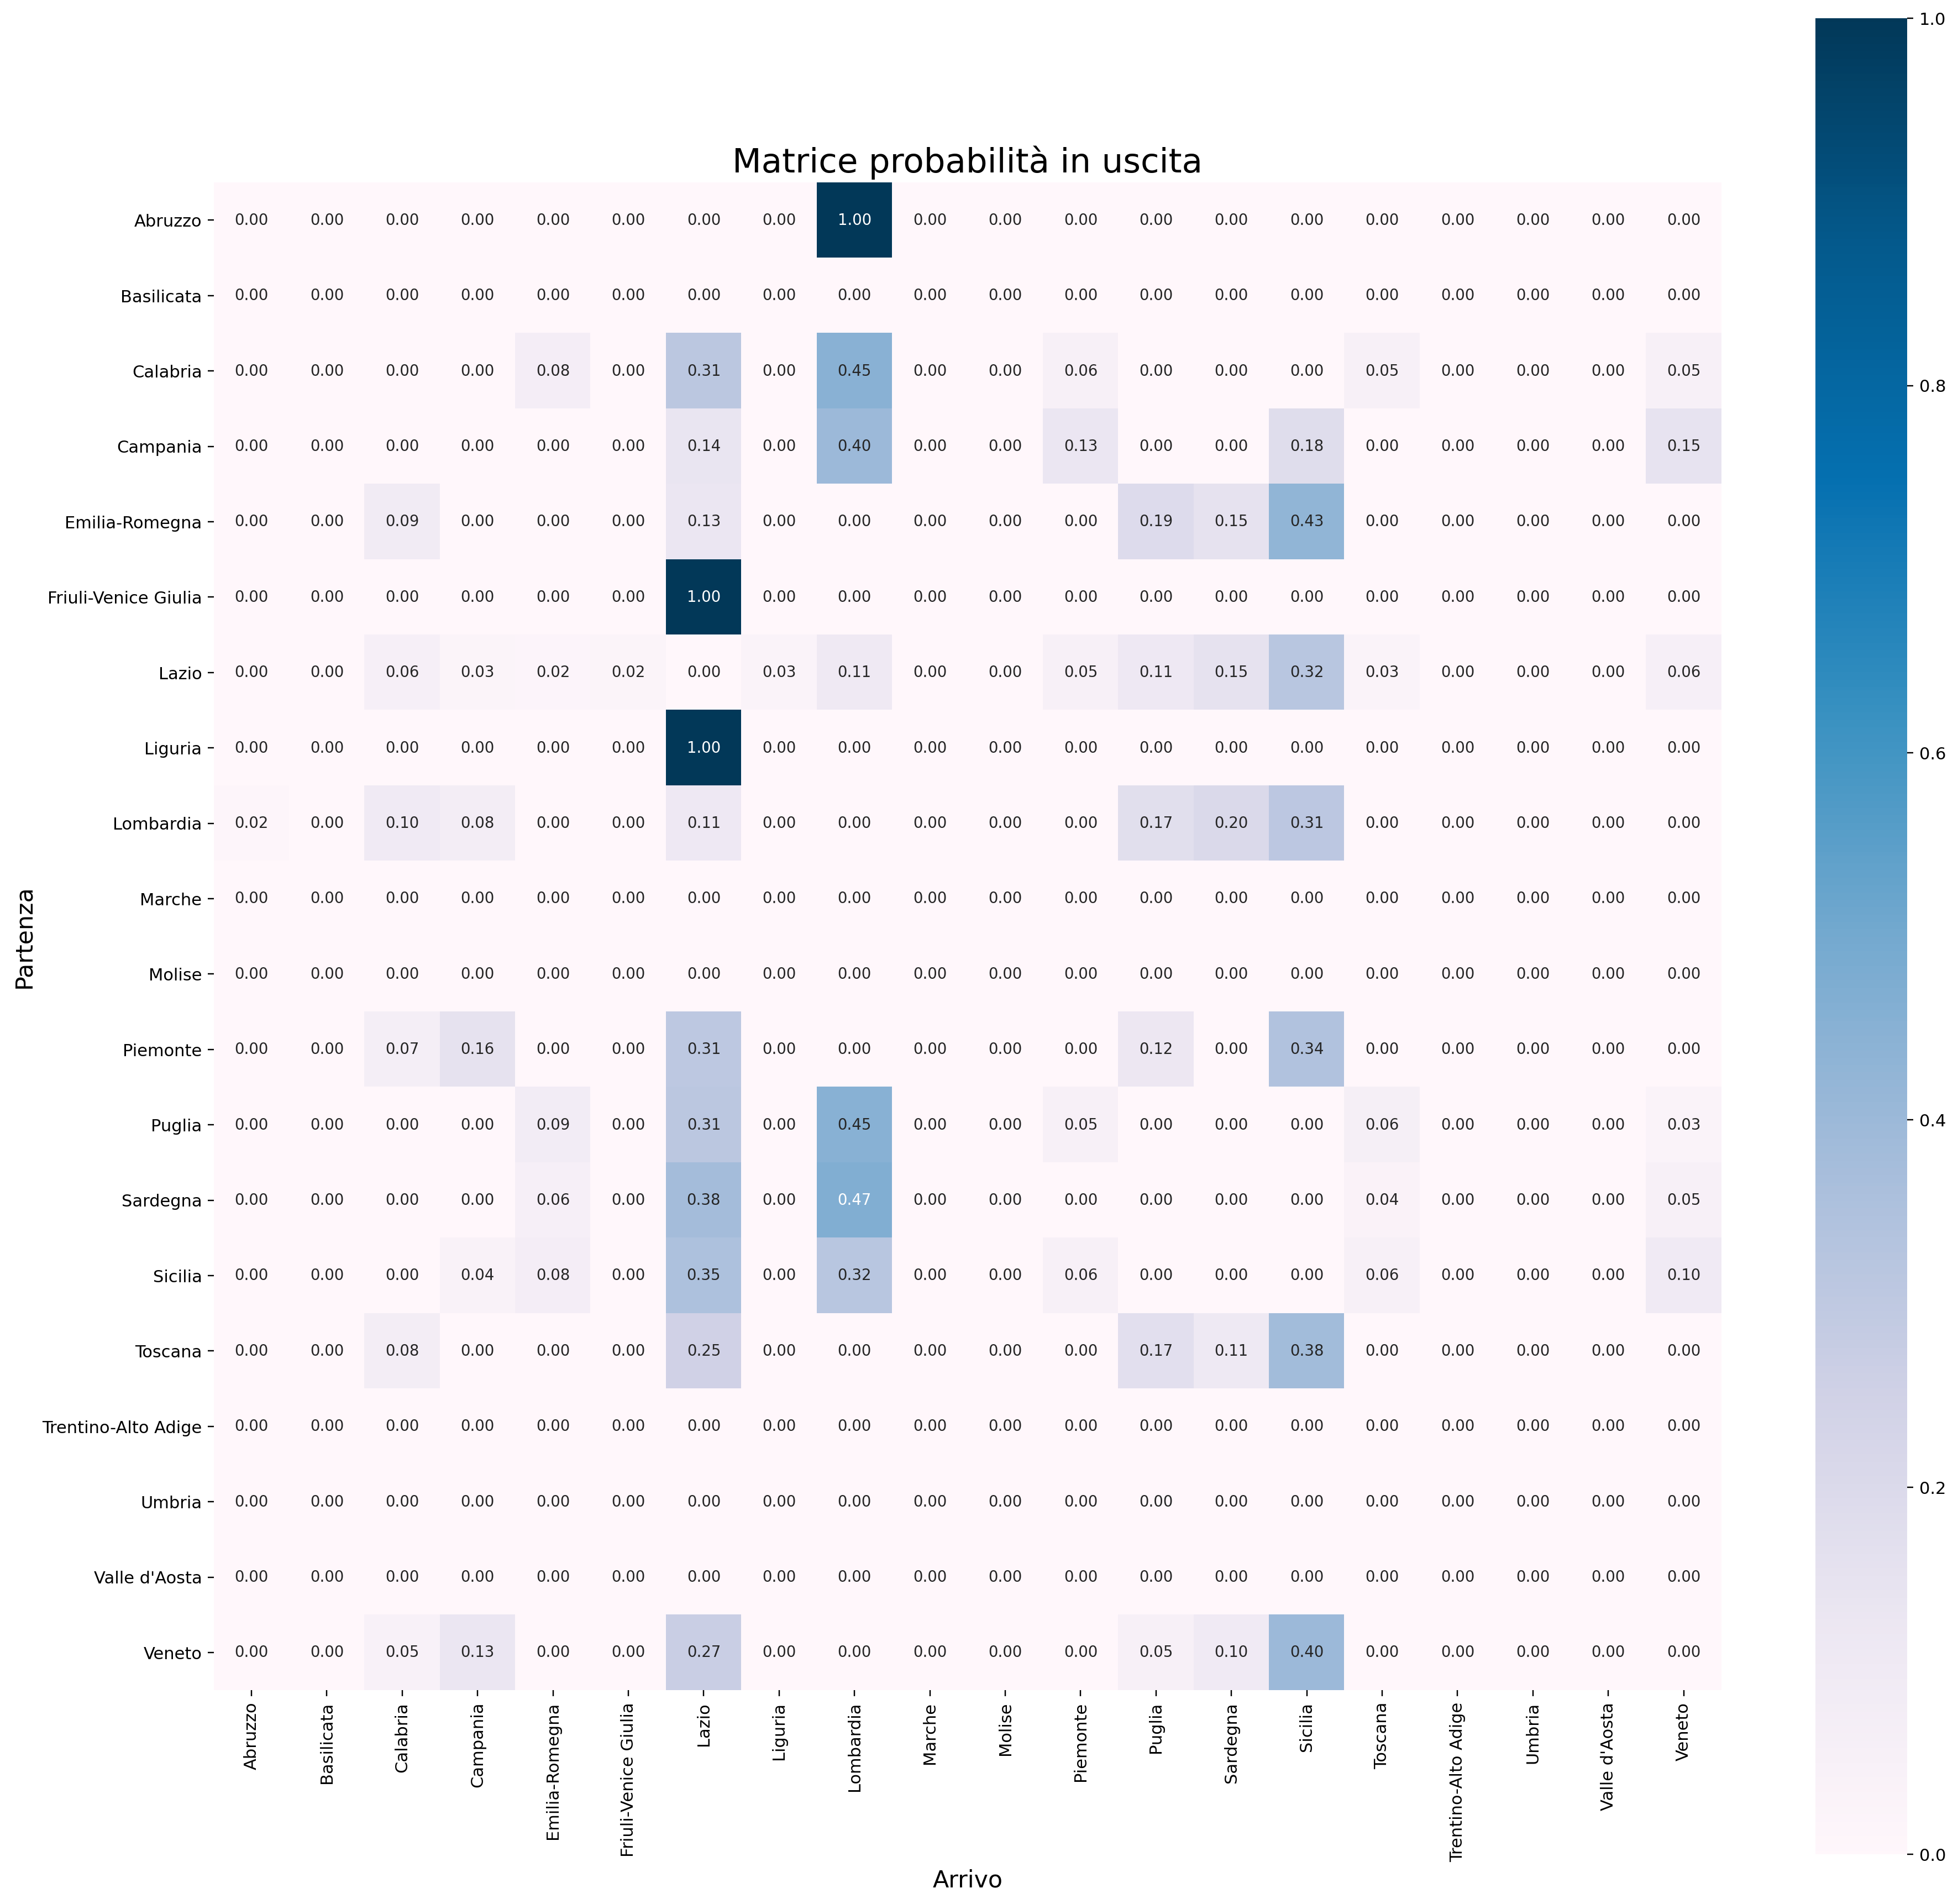

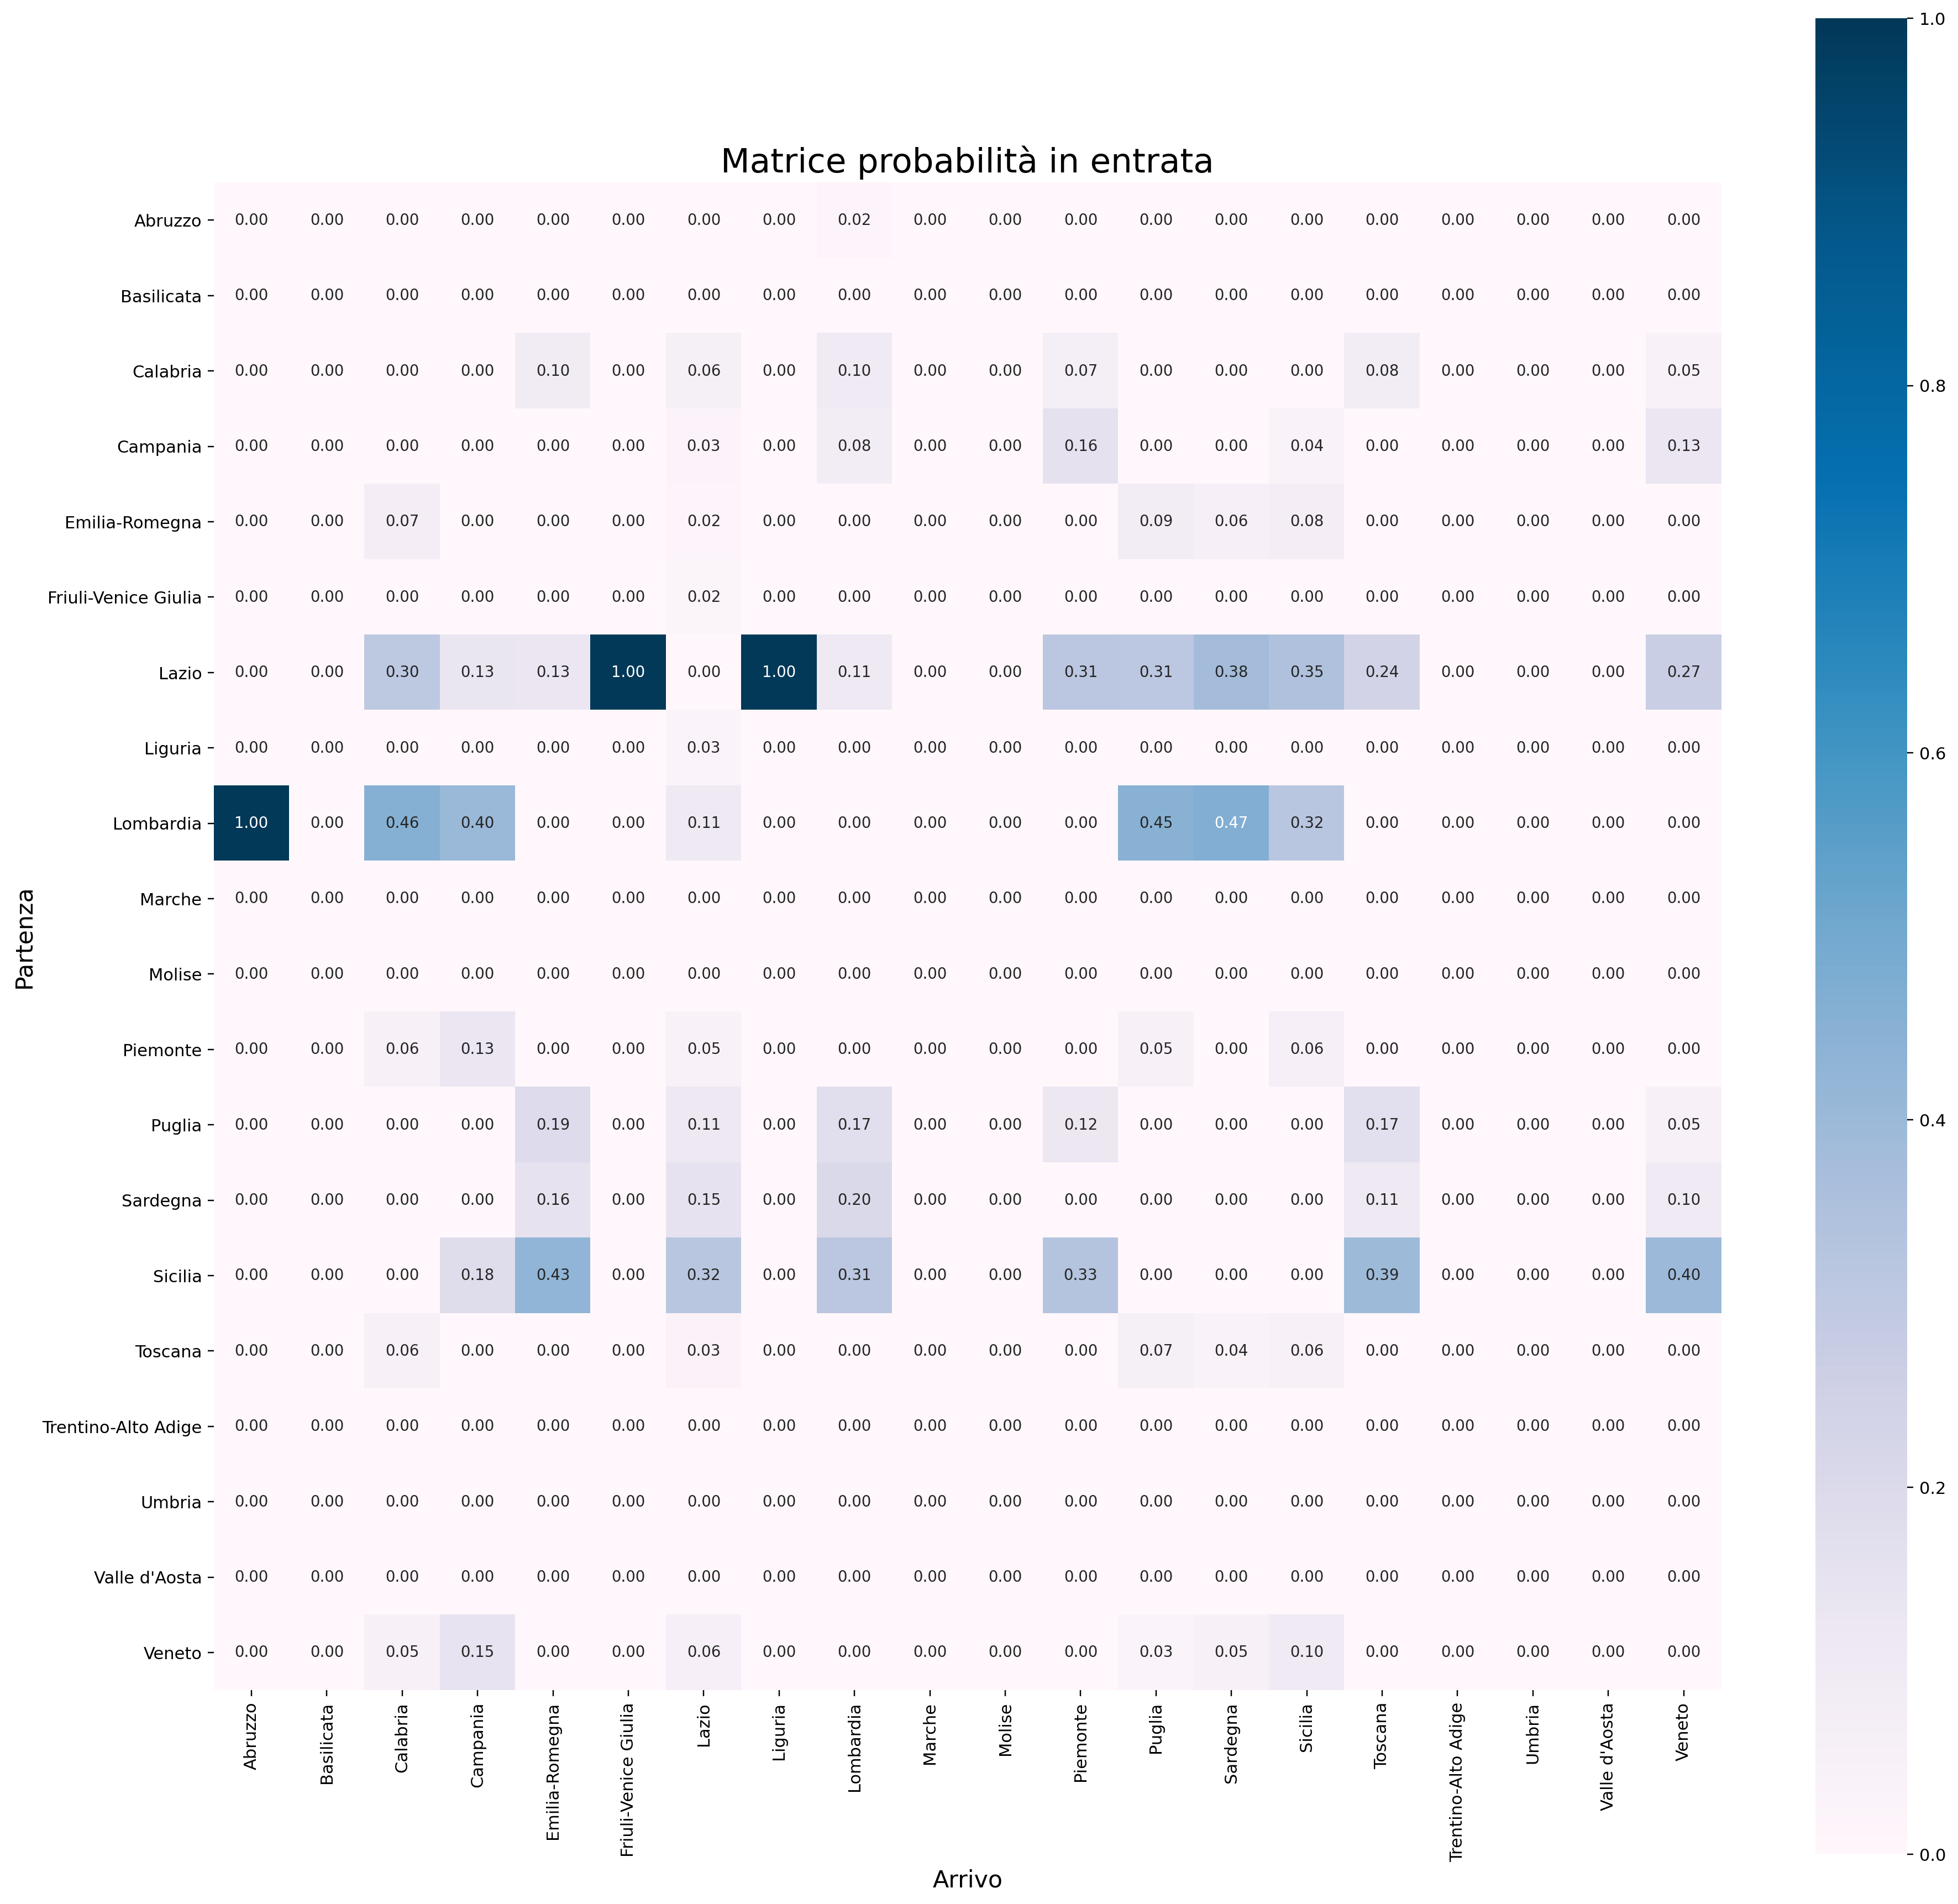

In [27]:
import seaborn as sns
plt.figure(figsize=(20,20), dpi=220)
plt.title('Matrice probabilità in uscita', fontsize=20)
hm = sns.heatmap(matrice_out,cbar=True,fmt='.2f',annot=True,square=True,annot_kws={'size': 9},
                 cmap = sns.color_palette("PuBu", 500), xticklabels=regioni, yticklabels=regioni)
plt.ylabel('Partenza',fontsize=14)
plt.xlabel('Arrivo',fontsize=14)
plt.savefig("img/matrice_prob_uscita.pdf", dpi=220, format='pdf')
plt.show()

plt.figure(figsize=(20,20), dpi=220)
plt.title('Matrice probabilità in entrata', fontsize=20)
hm = sns.heatmap(matrice_in,cbar=True,fmt='.2f',annot=True,square=True,annot_kws={'size': 9},
                 cmap = sns.color_palette("PuBu", 500), xticklabels=regioni, yticklabels=regioni)
plt.ylabel('Partenza',fontsize=14)
plt.xlabel('Arrivo',fontsize=14)
plt.savefig("img/matrice_prob_entrata.pdf", dpi=220, format='pdf')
plt.show()

In [28]:
# salvo matrici
np.save('data/matrice_flussi',matrice)
np.save('data/matrice_in',matrice_in)
np.save('data/matrice_out',matrice_out)

# CSV AEREI PER REGIONE

In [17]:
import csv
import numpy as np
matrice_out = np.load('data/matrice_out.npy')

comuni = []
# 0 id_istat
# 1 nome comune
# 2 long
# 3 lat
# 4 regione
with open ("treni/GeolocComuni.csv") as file:     ############## da completare
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        comuni.append(line)

regioni = ['Abruzzo', 'Basilicata', 'Calabria',
           'Campania', 'Emilia-Romagna', 'Friuli-Venezia Giulia',
           'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise',
           'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana',
           'Trentino-Alto Adige', 'Umbria', "Valle d'Aosta", 'Veneto']

In [18]:
quadri_regioni_norm = []
for i in range(matrice_out.shape[0]):
    for j in range(matrice_out.shape[1]):
        quadri_regioni_norm.append([regioni[i],regioni[j],matrice_out[i,j]])

In [25]:
# elimino righe con zero collegamenti
indici_da_eliminare = []
for ii, riga in enumerate(quadri_regioni_norm):
    if riga[2]==0:
        indici_da_eliminare.append(ii)

for indice in indici_da_eliminare[::-1]: # vado all'indietro altrimenti gli indici si modificano
    quadri_regioni_norm.pop(indice)
    
# cerco treni che viaggiano all'interno della stessa regione
indici_da_eliminare = []
for ii, riga in enumerate(quadri_regioni_norm):
    if riga[0]==riga[1]:
        indici_da_eliminare.append(ii)

for indice in indici_da_eliminare[::-1]: # vado all'indietro altrimenti gli indici si modificano
    quadri_regioni_norm.pop(indice)
    

#converto in capoluoghi
caps = []
with open ("treni/capoluoghi.csv") as file:     ############## da completare
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        caps.append(line)
lista_regioni = [cap[0] for cap in caps]
quadri_capoluoghi = []
for riga in quadri_regioni_norm:
    index1 = lista_regioni.index(riga[0])
    index2 = lista_regioni.index(riga[1])
    quadri_capoluoghi.append([caps[index1][1],caps[index2][1],riga[2]])    
    
# converto in codici
def converti_in_codici(quadro, comuni):
    quadro_conv = []
    nomi_comuni = [comune[1] for comune in comuni]
    for riga in quadro:
        index_source = nomi_comuni.index(riga[0])
        index_dest = nomi_comuni.index(riga[1])
        quadro_conv.append([comuni[index_source][0],comuni[index_dest][0],riga[2]])
    return quadro_conv

quadri_capoluoghi_norm = converti_in_codici(quadri_capoluoghi, comuni)
quadri_capoluoghi_norm
with open('capoluoghi_norm_aerei.csv','w') as f:
    for a in quadri_capoluoghi_norm:
        f.write(f'{a[0]},{a[1]},{a[2]}\n')

In [20]:
quadri_regioni_norm

[['Abruzzo', 'Lombardia', 1.0],
 ['Calabria', 'Emilia-Romagna', 0.07512648674547369],
 ['Calabria', 'Lazio', 0.3144179700146776],
 ['Calabria', 'Lombardia', 0.44905941079613954],
 ['Calabria', 'Piemonte', 0.05506307194619897],
 ['Calabria', 'Toscana', 0.05424456447677583],
 ['Calabria', 'Veneto', 0.052088496020734364],
 ['Campania', 'Lazio', 0.13956722274490008],
 ['Campania', 'Lombardia', 0.40041855021914224],
 ['Campania', 'Piemonte', 0.12993138897175244],
 ['Campania', 'Sicilia', 0.18296243603570528],
 ['Campania', 'Veneto', 0.14712040202849996],
 ['Emilia-Romagna', 'Calabria', 0.09383080860421476],
 ['Emilia-Romagna', 'Lazio', 0.13024033233984586],
 ['Emilia-Romagna', 'Puglia', 0.19298743417545158],
 ['Emilia-Romagna', 'Sardegna', 0.15445977594991847],
 ['Emilia-Romagna', 'Sicilia', 0.4284816489305693],
 ['Friuli-Venezia Giulia', 'Lazio', 1.0],
 ['Lazio', 'Calabria', 0.06166358906844285],
 ['Lazio', 'Campania', 0.02566779696281861],
 ['Lazio', 'Emilia-Romagna', 0.021093460634394785